In [1]:
cd ..

/Users/Amar/Dropbox/Computer_Science/GATECH-OMSCS/7641_ML/GT_ML_Project_1


In [2]:
%run __init__.py

In [3]:
%run src/load_data.py

In [4]:
from lib.benchmark import run_model, plot_results
from lib.benchmark import pipeline_basic
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
sns.set()

# Adult 

In [5]:
adt_data = data['adult']['train']['engineered']
adt_lbls = data['adult']['train']['labels']
mad_data = data['madelon']['train']['raw_data']
mad_lbls = data['madelon']['train']['labels']

In [6]:
cls = pipeline_basic(DecisionTreeClassifier)

In [7]:
param_grid = {
    'max_depth' :  [1,5,10,15,25,50],
    'max_features' : [None, 'auto', 'sqrt', 'log2'],
}
gs_adult = GridSearchCV(cls, param_grid, n_jobs=-1, cv = StratifiedKFold(), scoring=make_scorer(f1_score))
gs_adult.fit(adt_data, adt_lbls)
gs_madelon = GridSearchCV(cls, param_grid, n_jobs=-1, cv = StratifiedKFold(), scoring=make_scorer(f1_score))
gs_madelon.fit(mad_data, mad_lbls);

/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/m

(0.45, 0.85)

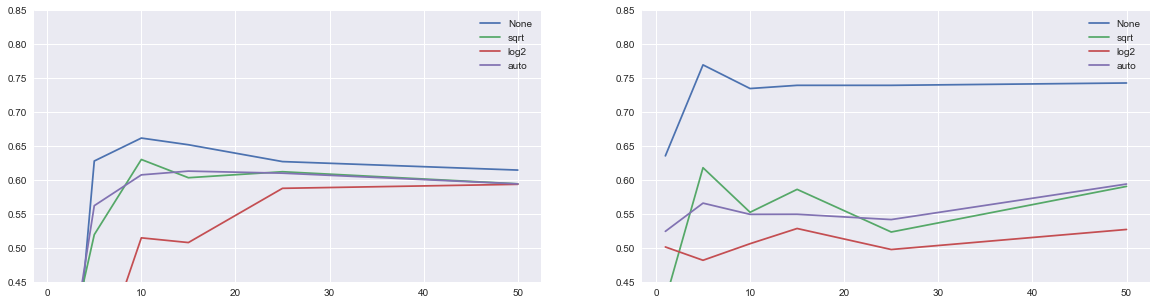

In [8]:
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,2,1)
dt_results = pd.DataFrame(gs_adult.cv_results_)
plt.plot(dt_results[dt_results['param_max_features'].astype(str) == 'None']['param_max_depth'],
         dt_results[dt_results['param_max_features'].astype(str) == 'None']['mean_test_score'], label="None")
plt.plot(dt_results[dt_results['param_max_features'] == 'sqrt']['param_max_depth'],
         dt_results[dt_results['param_max_features'] == 'sqrt']['mean_test_score'], label="sqrt")
plt.plot(dt_results[dt_results['param_max_features'] == 'log2']['param_max_depth'],
         dt_results[dt_results['param_max_features'] == 'log2']['mean_test_score'], label="log2")
plt.plot(dt_results[dt_results['param_max_features'] == 'auto']['param_max_depth'],
         dt_results[dt_results['param_max_features'] == 'auto']['mean_test_score'], label="auto")
plt.legend()
plt.ylim(0.45,0.85)
fig.add_subplot(1,2,2)
dt_results = pd.DataFrame(gs_madelon.cv_results_)
plt.plot(dt_results[dt_results['param_max_features'].astype(str) == 'None']['param_max_depth'],
         dt_results[dt_results['param_max_features'].astype(str) == 'None']['mean_test_score'], label="None")
plt.plot(dt_results[dt_results['param_max_features'] == 'sqrt']['param_max_depth'],
         dt_results[dt_results['param_max_features'] == 'sqrt']['mean_test_score'], label="sqrt")
plt.plot(dt_results[dt_results['param_max_features'] == 'log2']['param_max_depth'],
         dt_results[dt_results['param_max_features'] == 'log2']['mean_test_score'], label="log2")
plt.plot(dt_results[dt_results['param_max_features'] == 'auto']['param_max_depth'],
         dt_results[dt_results['param_max_features'] == 'auto']['mean_test_score'], label="auto")
plt.legend()
plt.ylim(0.45,0.85)

In [9]:
param_grid = {
    'max_depth' :  [5,10,15,25,50],
    'max_features' : [None, 1.0, .9, .8, .7, .6, .5, .4, .3]
}
gs_adult = GridSearchCV(cls, param_grid, n_jobs=-1, cv = StratifiedKFold(), scoring=make_scorer(f1_score))
gs_adult.fit(adt_data, adt_lbls)
gs_madelon = GridSearchCV(cls, param_grid, n_jobs=-1,cv = StratifiedKFold(), scoring=make_scorer(f1_score))
gs_madelon.fit(mad_data, mad_lbls);

(0.45, 0.85)

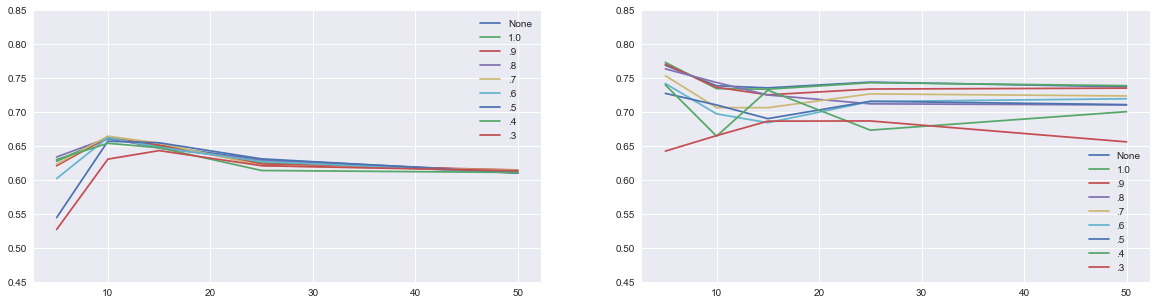

In [10]:
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,2,1)
dt_results = pd.DataFrame(gs_adult.cv_results_)
plt.plot(dt_results[dt_results['param_max_features'].astype(str) == 'None']['param_max_depth'],
         dt_results[dt_results['param_max_features'].astype(str) == 'None']['mean_test_score'], label="None")
plt.plot(dt_results[dt_results['param_max_features'] == 1.0]['param_max_depth'],
         dt_results[dt_results['param_max_features'] == 1.0]['mean_test_score'], label="1.0")
plt.plot(dt_results[dt_results['param_max_features'] == .9]['param_max_depth'],
         dt_results[dt_results['param_max_features'] == .9]['mean_test_score'], label=".9")
plt.plot(dt_results[dt_results['param_max_features'] == .8]['param_max_depth'],
         dt_results[dt_results['param_max_features'] == .8]['mean_test_score'], label=".8")
plt.plot(dt_results[dt_results['param_max_features'] == .7]['param_max_depth'],
         dt_results[dt_results['param_max_features'] == .7]['mean_test_score'], label=".7")
plt.plot(dt_results[dt_results['param_max_features'] == .6]['param_max_depth'],
         dt_results[dt_results['param_max_features'] == .6]['mean_test_score'], label=".6")
plt.plot(dt_results[dt_results['param_max_features'] == .5]['param_max_depth'],
         dt_results[dt_results['param_max_features'] == .5]['mean_test_score'], label=".5")
plt.plot(dt_results[dt_results['param_max_features'] == .4]['param_max_depth'],
         dt_results[dt_results['param_max_features'] == .4]['mean_test_score'], label=".4")
plt.plot(dt_results[dt_results['param_max_features'] == .3]['param_max_depth'],
         dt_results[dt_results['param_max_features'] == .3]['mean_test_score'], label=".3")
plt.legend()
plt.ylim(0.45,0.85)
fig.add_subplot(1,2,2)
dt_results = pd.DataFrame(gs_madelon.cv_results_)
plt.plot(dt_results[dt_results['param_max_features'].astype(str) == 'None']['param_max_depth'],
         dt_results[dt_results['param_max_features'].astype(str) == 'None']['mean_test_score'], label="None")
plt.plot(dt_results[dt_results['param_max_features'] == 1.0]['param_max_depth'],
         dt_results[dt_results['param_max_features'] == 1.0]['mean_test_score'], label="1.0")
plt.plot(dt_results[dt_results['param_max_features'] == .9]['param_max_depth'],
         dt_results[dt_results['param_max_features'] == .9]['mean_test_score'], label=".9")
plt.plot(dt_results[dt_results['param_max_features'] == .8]['param_max_depth'],
         dt_results[dt_results['param_max_features'] == .8]['mean_test_score'], label=".8")
plt.plot(dt_results[dt_results['param_max_features'] == .7]['param_max_depth'],
         dt_results[dt_results['param_max_features'] == .7]['mean_test_score'], label=".7")
plt.plot(dt_results[dt_results['param_max_features'] == .6]['param_max_depth'],
         dt_results[dt_results['param_max_features'] == .6]['mean_test_score'], label=".6")
plt.plot(dt_results[dt_results['param_max_features'] == .5]['param_max_depth'],
         dt_results[dt_results['param_max_features'] == .5]['mean_test_score'], label=".5")
plt.plot(dt_results[dt_results['param_max_features'] == .4]['param_max_depth'],
         dt_results[dt_results['param_max_features'] == .4]['mean_test_score'], label=".4")
plt.plot(dt_results[dt_results['param_max_features'] == .3]['param_max_depth'],
         dt_results[dt_results['param_max_features'] == .3]['mean_test_score'], label=".3")
plt.legend()
plt.ylim(0.45,0.85)

In [18]:
param_grid = {
    'max_depth' :  [1,2,3,4,5,10,15,20,25,30,40],
    'criterion' : ['entropy', 'gini'],
}
gs_adult = GridSearchCV(cls, param_grid, n_jobs=-1,cv = StratifiedKFold(), scoring=make_scorer(f1_score))
gs_adult.fit(adt_data, adt_lbls)
gs_madelon = GridSearchCV(cls, param_grid, n_jobs=-1,cv = StratifiedKFold(), scoring=make_scorer(f1_score))
gs_madelon.fit(mad_data, mad_lbls);

/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/m

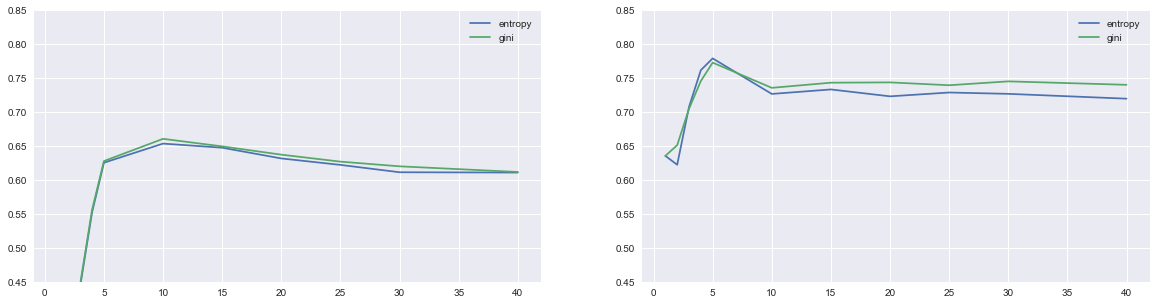

In [19]:
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,2,1)
dt_results = pd.DataFrame(gs_adult.cv_results_)
plt.plot(dt_results[dt_results['param_criterion'] == 'entropy']['param_max_depth'],
         dt_results[dt_results['param_criterion'] == 'entropy']['mean_test_score'], label="entropy")
plt.plot(dt_results[dt_results['param_criterion'] == 'gini']['param_max_depth'],
         dt_results[dt_results['param_criterion'] == 'gini']['mean_test_score'], label="gini")
plt.ylim(0.45,0.85)
plt.legend()
fig.add_subplot(1,2,2)
dt_results = pd.DataFrame(gs_madelon.cv_results_)
plt.plot(dt_results[dt_results['param_criterion'] == 'entropy']['param_max_depth'],
         dt_results[dt_results['param_criterion'] == 'entropy']['mean_test_score'], label="entropy")
plt.plot(dt_results[dt_results['param_criterion'] == 'gini']['param_max_depth'],
         dt_results[dt_results['param_criterion'] == 'gini']['mean_test_score'], label="gini")
plt.ylim(0.45,0.85)
plt.legend()



In [20]:
param_grid = {
    'max_depth' :  [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    'criterion' : ['gini'],
    'max_features' : [None]
}
gs_adult = GridSearchCV(cls, param_grid, n_jobs=-1,cv = StratifiedKFold(), scoring=make_scorer(f1_score))
gs_adult.fit(adt_data, adt_lbls)
gs_madelon = GridSearchCV(cls, param_grid, n_jobs=-1,cv = StratifiedKFold(), scoring=make_scorer(f1_score))
gs_madelon.fit(mad_data, mad_lbls);

/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Amar/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5,1,'Madelon')

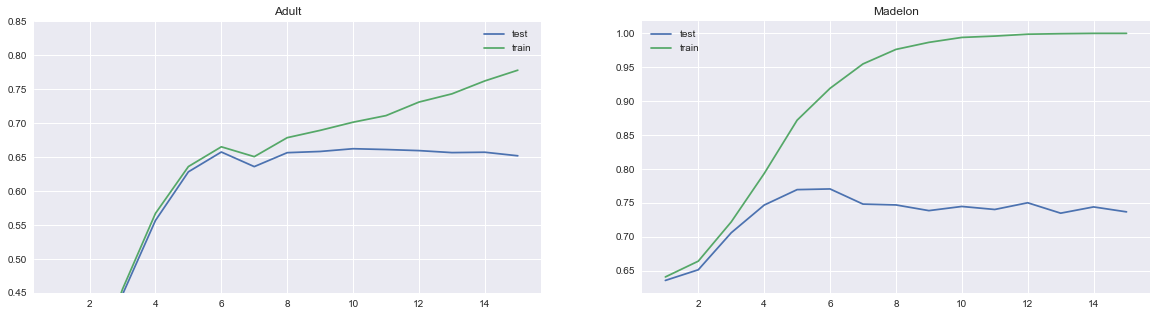

In [21]:
fig = plt.figure(figsize=(20,5))
fig.add_subplot(1,2,1)
dt_results = pd.DataFrame(gs_adult.cv_results_)
plt.plot(dt_results['param_max_depth'],dt_results['mean_test_score'], label = "test")
plt.plot(dt_results['param_max_depth'],dt_results['mean_train_score'],label = "train" )
plt.legend()
plt.title("Adult")
plt.ylim(0.45,0.85)
fig.add_subplot(1,2,2)
dt_results = pd.DataFrame(gs_madelon.cv_results_)
plt.plot(dt_results['param_max_depth'], dt_results['mean_test_score'], label = 'test')
plt.plot(dt_results['param_max_depth'], dt_results['mean_train_score'], label = 'train')
plt.legend()
plt.title("Madelon")
#plt.ylim(0.45,0.85)



In [22]:
dt_results = pd.DataFrame(gs_adult.cv_results_)
dt_results.to_pickle("results/DT_gs_adult.p")

In [23]:
dt_results = pd.DataFrame(gs_madelon.cv_results_)
dt_results.to_pickle("results/DT_gs_madelon.p")